In [1]:
import torch.nn as nn
import torch
import torchvision
import numpy as np

/home/emir/miniconda3/envs/mlptorch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
from mmseg.models import SegmenterMaskTransformerHead
import mmcv

/home/emir/miniconda3/envs/mlptorch/lib/python3.10/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


# so we will use mask transformer for decoder

In [4]:
import mmseg
from mmseg.models import SegmenterMaskTransformerHead
from mmseg.apis import init_segmentor, inference_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

In [5]:
config_file = "../mmsegmentation/configs/segmenter/segmenter_vit-l_mask_8x1_640x640_160k_ade20k.py"
cp_file = "/home/emir/Desktop/dev/myResearch/seg_model/cp_seg_16/segmenter_vit-l_mask_8x1_640x640_160k_ade20k_20220614_024513-4783a347.pth"

In [6]:
model = init_segmentor(config=config_file, device=device, checkpoint=cp_file)

/home/emir/Desktop/dev/myResearch/src/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


load checkpoint from local path: /home/emir/Desktop/dev/myResearch/seg_model/cp_seg_16/segmenter_vit-l_mask_8x1_640x640_160k_ade20k_20220614_024513-4783a347.pth


In [21]:
from mmseg.datasets.ade import ADE20KDataset
imgs_dir = "/home/emir/Desktop/dev/myResearch/dataset/Ade20K/release_test/testing/"

In [17]:
results = inference_segmentor(model=model, imgs=img_dir)

In [18]:
type(model)

mmseg.models.segmentors.encoder_decoder.EncoderDecoder

In [19]:
import matplotlib.pyplot as plt
np.array(results).shape

(1, 512, 768)

In [26]:
import os
def visualize_random_seg(model, imgs_dir):
    test_imgs = os.listdir(imgs_dir)
    rand_ind = np.random.randint(len(test_imgs))
    img_dir = test_imgs[rand_ind]
    results = inference_segmentor(model=model, imgs=imgs_dir+img_dir)
    show_result_pyplot(model=model, img=imgs_dir+img_dir, result=results, palette=get_palette("ade20k"))
    

/home/emir/Desktop/dev/myResearch/src/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


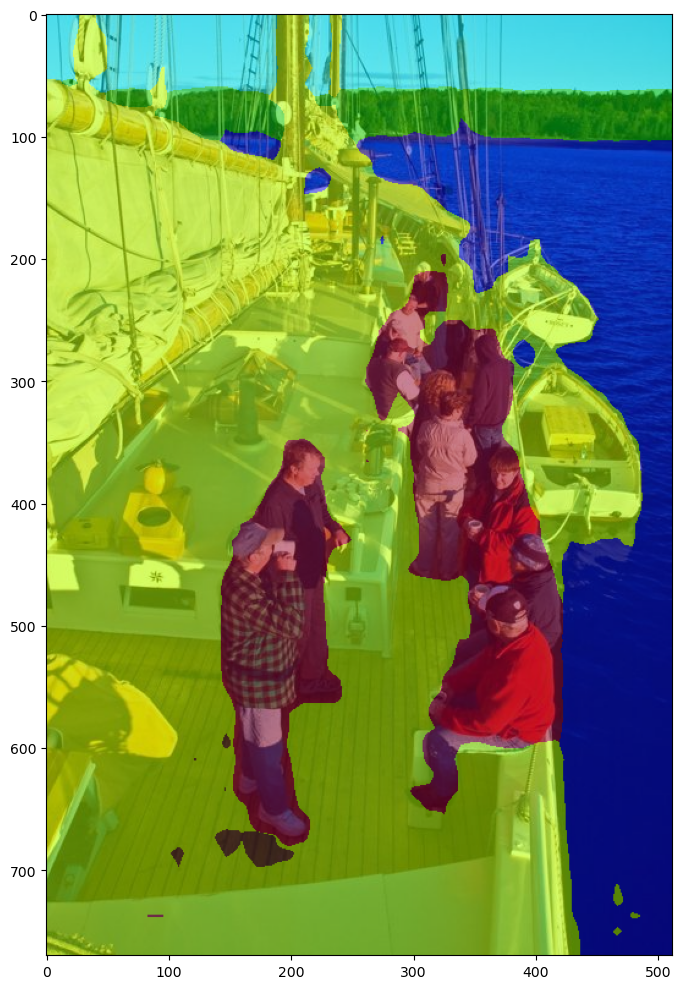

In [27]:
visualize_random_seg(model=model, imgs_dir=imgs_dir)